# Topic Modeling

INCLUDE:
- Topic Modeling：
    - LDA: Latent Dirichlet Allocation (潜在狄利克雷分配)
    - HDP: Hierarchical Dirichlet Process (分层狄利克雷过程)
    - Cosine Similarity(余弦相似度)
    - Document Clustering(文档聚类)
- Vectorization(向量化)：
    - Bag of Words (BoW) 
    - Term-Document Matrices: CountVectorizer(词-文档矩阵)
    - TF-IDF(Term Frequency-Inverse Document Frequency: 词频-逆文档频率)
    - Word Embeddings: Word2Vec, GloVe, FastText(词嵌入)

LDA和HDP用于主题建模，是一种无监督学习的技术，用于从文本数据中发现隐藏的主题结构。它们可以自动识别文档集合中的主题，帮助理解文档的主要内容。

Cosine Similarity: 用于计算两个向量之间的余弦值，表示它们之间的相似性。一般用于计算文档之间的相似性。

TFIDF，BoW，TDM,Word Embeddings都是文本特征提取的方法，它们的目的是将文本数据转换为数值形式，以便于计算机进行处理。这些方法可以用于文本分类、信息检索、文本聚类等任务。
BoW通常指的是单个文档的词频向量表示，而TDM是将多个文档的BoW表示汇总在一起形成的矩阵。每个文档的BoW向量是TDM的一列。

# 0. Basic Concepts
## 0.1 主题建模
主题建模是一种统计模型，用于发现大量文档集合中的隐藏主题信息。它可以自动识别文本数据中的主题结构，帮助理解文档的主要内容。在主题建模中，文档被认为是一系列主题的混合，而每个主题则是一系列关键词的集合。

### 主要模型

- **潜在语义分析（Latent Semantic Analysis, LSA）**：通过奇异值分解（SVD）来降维文本数据，从而发现文本数据中的潜在语义结构。
- **潜在狄利克雷分配（Latent Dirichlet Allocation, LDA）**：是最常用的主题建模技术之一，它假设文档是从隐含主题的混合中生成的，而每个主题则是对词汇的一个概率分布。LDA能够学习文档集合中主题的表示，并且为每个文档提供一个主题分布。
- **分层狄利克雷过程（Hierarchical Dirichlet Process, HDP）**：是一种非参数贝叶斯方法，不需要事先指定主题的数量，能够根据数据自动确定主题数。

### 工作原理

1. **预处理**：包括分词、去除停用词、词干提取等，将文本转换为更适合建模的形式。
2. **向量化**：将预处理后的文本转换为数值形式，如词袋（Bag of Words）或TF-IDF表示。
3. **模型训练**：选择一个主题模型并用文档集合训练它。模型会尝试找到最佳的方式，将文档集合中的每个文档表示为主题的混合，同时每个主题表示为词的分布。
4. **主题分析**：分析模型输出，识别每个主题的关键词，理解文档集合中的主要主题。

### 应用

- **文档分类与标注**：通过主题建模，可以自动给文档打上标签，便于分类和检索。
- **信息检索**：改善搜索算法，通过理解文档的主题结构来提高搜索的相关性。
- **内容推荐**：基于用户的阅读偏好和内容的主题相似性进行个性化推荐。
- **趋势分析**：分析时间序列数据中主题的演变，发现趋势和模式。


## 0.2 LDA: Latent Dirichlet Allocation (潜在狄利克雷分配)
潜在狄利克雷分配（Latent Dirichlet Allocation，简称LDA）是一种主题模型，它允许我们从文本集合中发现隐藏的主题信息。LDA是基于以下假设：文档是由一组主题的混合生成的，而每个主题则是由一组单词的分布定义的。

LDA的工作原理大致可以分为以下几个步骤：

1. **初始化**：首先，随机给每个文档中的每个单词分配一个主题，这一步是完全随机的，可以理解为一个初始化过程。

2. **迭代更新**：之后，LDA通过迭代过程不断更新每个单词所属的主题，这个更新是基于两个准则：一个是单词在文档中对主题的贡献度，另一个是单词在主题中的分布。这个过程可以用以下两个角度来理解：
   - 文档-主题分布：每个文档中的每个单词对于文档所含主题的贡献。简而言之，如果一个文档中包含很多与某一主题相关的单词，那么这个文档就很可能属于这个主题。
   - 主题-单词分布：在每个主题中，每个单词出现的概率。也就是说，如果一个单词在某一主题下出现的频率很高，那么这个单词就很有可能属于这个主题。

3. **收敛**：通过迭代，每个单词的主题标签会不断更新，直到达到一个稳定状态，即模型收敛。此时，我们可以得到两个重要的分布：
   - 每个文档对应的主题分布。这可以帮助我们理解每个文档主要讨论了哪些主题。
   - 每个主题对应的单词分布。这可以帮助我们理解每个主题主要由哪些单词组成。

LDA背后的数学基础是狄利克雷分布（Dirichlet Distribution），这是一种多变量的概率分布，用于模拟文档中主题的分布情况以及主题内单词的分布情况。通过狄利克雷分布，LDA能够灵活地表示文档中主题的不确定性，以及主题中单词的多样性。

LDA是一种非常强大的文本分析工具，广泛用于文档分类、信息检索、情感分析等领域。通过LDA，我们可以无需先验知识，就能从大量文本数据中自动发现有意义的主题，为后续的文本分析和处理提供了一种强有力的方法。

## HDP: Hierarchical Dirichlet Process (分层狄利克雷过程)
HDP（Hierarchical Dirichlet Process，层次狄利克雷过程）是一种非参数贝叶斯方法，用于处理具有不确定数量类别（或主题）的模型，特别是在主题模型和聚类分析中广泛应用。HDP可以看作是LDA（Latent Dirichlet Allocation，潜在狄利克雷分配）的扩展，它允许模型自动确定主题的数量，而无需事先指定。

- **狄利克雷过程（DP）**：是一种概率分布的分布，常用作非参数贝叶斯方法中的先验分布。狄利克雷过程使得模型可以根据数据的复杂度自适应地调整其参数（如聚类的数量）。
- **层次狄利克雷过程（HDP）**：通过构建一层狄利克雷过程上的另一层狄利克雷过程，HDP能够更灵活地处理多层结构数据，例如多个文档集合中的主题分布，其中每个文档集合可能具有不同的主题分布，但所有集合共享相同的主题集。

HDP背后的核心思想是使用狄利克雷过程作为构建块，通过层次化结构来模拟数据中的组织层次。在HDP主题模型中，每个文档被认为是从一个文档特定的主题分布中抽取的，而这些文档特定的主题分布则是从一个全局的主题分布中抽取的。全局主题分布由狄利克雷过程生成，这允许共享主题在所有文档中自然出现，并且文档中的主题数量可以自适应地根据数据集的复杂性变化。

HDP在许多领域都有应用，尤其是在文本挖掘中，如：

- **主题发现**：自动从大量文档中发现主题，而无需预先设定主题数量。
- **文档聚类**：根据文档的主题内容将文档自动分类到不同的类别中。
- **时间序列分析**：分析随时间变化的主题分布，例如在动态主题模型中的应用。



**优点**：

- 自动确定主题数量，提供了灵活性和适应性。
- 能够共享全局主题，适用于多文档集合分析。

**局限性**：

- 计算成本高：HDP模型的训练通常比固定主题数量的模型更加复杂和耗时。
- 模型选择和评估更复杂：虽然不需要预先指定主题数，但仍需要选择其他超参数，且模型评估方法也更为复杂。

HDP为处理和理解大规模文本集合提供了强大的工具，尤其是在主题的数量不明确或可能随时间变化的情况下。

## LDA vs. HDP

### LDA（潜在狄利克雷分配）

**应用情景**：
- 文档主题发现：在知道大致的主题数量时，LDA可以用来识别和解释文档集合中的主题。
- 文档分类：根据文档的主题分布，将文档分类到预定义的类别中。
- 推荐系统：通过比较用户偏好的主题分布和物品（如文章、商品）的主题分布，来进行个性化推荐。

**优点**：
- 简单直观，易于理解和实现。
- 广泛应用于文本数据的主题建模，有丰富的研究和应用基础。

**局限性**：
- 需要预先指定主题数量，这可能在没有足够领域知识的情况下难以确定。
- 对于模型的每个参数，LDA不如HDP那样灵活。

### HDP（层次狄利克雷过程）

**应用情景**：
- 动态主题发现：在文档集合的规模或复杂度未知，或者主题数量可能随时间变化的场景中，HDP提供了更大的灵活性。
- 大规模文档集合分析：适用于需要从大量文档中抽取结构化知识，而主题数量不明确的情况。
- 跨文档集合的主题共享：当有多个相关的文档集合，且希望识别共享主题时，HDP能够自动调整主题数量，并发现跨集合的共享主题。

**优点**：
- 自动确定主题数量，更加灵活。
- 适用于复杂或不断变化的数据集，能够适应不同的数据规模和复杂度。

**局限性**：
- 计算复杂度高，尤其是在大规模数据集上。
- 超参数选择和模型评估比LDA更加复杂。

### 总结

- **选择LDA**：当你有合理的预估或者对主题数量有明确的设定时，以及在计算资源受限或需要简单快速的模型时。
- **选择HDP**：当数据集的规模和复杂度未知，或主题数量可能随时间和数据变化时，以及当你需要模型自动适应数据结构时。

在实际应用中，选择哪个模型取决于具体任务的需求、数据集的特性以及计算资源的可用性。

## 0.3 Document Clustering
文档聚类（Document Clustering）是指将文档集合中相似的文档自动分组到一起的过程。这是一种无监督的机器学习技术，因为它不依赖于预先标记的文档分类。文档聚类的目的是发现数据中的自然分组或结构，以便可以按照主题或内容对文档进行组织、摘要或查找。

文档聚类的关键步骤通常包括：

1. **预处理**：清洗文档数据，去除停用词，进行词干提取或词形还原，将文本数据转换为适合算法处理的格式。
2. **特征提取**：将文本转换为数值形式，最常见的方法是使用词袋模型（Bag of Words）或TF-IDF（Term Frequency-Inverse Document Frequency）权重。
3. **选择聚类算法**：常见的文档聚类算法包括K-means、层次聚类（Hierarchical clustering）、DBSCAN等。
4. **聚类执行**：使用选定的算法对特征向量进行聚类分析。
5. **评估**：使用如轮廓系数（Silhouette Coefficient）等指标评估聚类结果的好坏。

文档聚类在信息检索、文档管理、主题发现和内容推荐等多个领域都有应用。例如，搜索引擎可以使用文档聚类技术来组织搜索结果，使用户能够更容易地找到相关信息。

## 0.4 Vectorization
向量化（Vectorization）是指将非数值型数据转换为数值型数据的过程。在自然语言处理中，向量化通常指的是将文本数据转换为数值型特征向量的过程，以便于计算机进行处理。

### 1. Bag of Words (BoW)
词袋模型（Bag of Words, BoW）：这是最简单的文本表示法之一，它将文本转换为固定长度的向量。BoW模型忽略文本中单词的顺序和语法，只考虑词汇的出现频次。向量的每个元素对应词汇表中的一个单词，元素的值为该单词在文档中的出现次数。词袋模型的向量一般是稀疏的，因为文档中出现的词汇只是词汇表中的一小部分。

### 2. Term-Document Matrices
Term-Document Matrices（术语-文档矩阵），是文本挖掘和信息检索领域常用的一种数据表示方法，用于表示术语在文档集合中的分布情况。在这种矩阵中，每一行代表一个术语（例如，一个词或短语），每一列代表一个文档，矩阵中的每个元素表示该术语在相应文档中出现的频率或权重。


在创建Term-Document Matrices时，通常会进行一些预处理步骤，比如去除停用词（如“的”，“是”等常见但对主题不具有辨识度的词）、词干提取（将词汇还原为基本形式）、词形还原等，以提高分析的效率和准确性。

词项文档矩阵是词袋模型的一个具体实现方式，是将多个文档的词袋向量组合起来形成的矩阵。在这个矩阵中，每一行代表一个唯一的词项，每一列代表一个文档，因此矩阵中的每个元素代表了相应词项在相应文档中出现的频次。TDM提供了一种便捷的方式来表示和分析多个文档的文本数据。

总结来说，词袋模型是一种将文本数据转换为数值向量的方法，而词项文档矩阵是这种方法的具体表现形式之一，用于处理和分析多个文档。

### 3. TF-IDF
TF-IDF（Term Frequency-Inverse Document Frequency）模型是一种用于信息检索与文本挖掘的常用加权技术。TF-IDF用于评估一个词对于一个文件集或一个语料库中的其中一份文件的重要性。其思想是：如果某个词在一篇文章中出现的频率高（Term Frequency，TF），并且在其他文章中很少出现（Inverse Document Frequency，IDF），则认为这个词具有很好的类别区分能力，对理解文档的内容很重要。


TF-IDF的具体计算方法如下：

- **TF (词频)**：某个词在文档中出现的次数除以文档的总词数。这反映了词在文档中的重要性。

$$\[ TF(t, d) = \frac{词t在文档d中的出现次数}{文档d的总词数} \]$$

- **IDF (逆文档频率)**：对词频的校正，可以抑制常见词的权重。计算方法是文档总数除以包含该词的文档数，然后取对数得到。

$$\[ IDF(t, D) = \log \frac{文档总数}{包含词t的文档数 + 1} \]$$

这里加1是为了避免分母为0的情况。

- **TF-IDF**：某个词在文档中的TF乘以该词的IDF，得到该词在文档中的重要性评分。

$$\[ TF\text{-}IDF(t, d, D) = TF(t, d) \times IDF(t, D) \]$$


TF-IDF模型在信息检索、文本挖掘、用户建模等领域有广泛应用：

1. **文档相似性**：通过计算文档的TF-IDF向量，可以使用余弦相似度等方法来评估文档之间的相似性。
2. **关键词提取**：TF-IDF分数高的词可以认为是文档的关键词。
3. **文本分类**：TF-IDF可以作为特征向量输入到分类算法中，用于文本分类任务。
4. **搜索引擎**：搜索引擎使用TF-IDF权重来评估用户查询与文档的相关性。

尽管TF-IDF是一个非常有用的模型，但它有一些局限性，如不考虑词与词之间的位置信息、上下文信息和同义词问题。因此，在实际应用中，TF-IDF经常与其他模型或技术（如词嵌入）结合使用，以提高模型的表现。

### 4. Word Embeddings
Word embedding（词嵌入）是一种文本表示方法，它能够将词语或短语从词汇表中映射到向量空间中，这些向量能够捕捉到词语之间的语义和语法关系。词嵌入的向量通常是高维的（例如，几百维），并且是稠密的，每个维度代表不同的隐含属性，这与传统的稀疏表示方法（如one-hot encoding）形成对比。常见的词嵌入模型包括Word2Vec、GloVe和FastText。与BoW和TF-IDF不同，词嵌入能够捕获单词之间的相似性和语义关系。

词嵌入的基本思想是基于这样一个假设：在相似上下文中出现的词语具有相似的意义。因此，通过学习这些词语在大量文本数据中的上下文关系，可以得到能够表征词语意义的向量表示。这些向量能够用于各种自然语言处理任务，如文本分类、情感分析、机器翻译和问答系统等。

常见的词嵌入模型包括：

- **Word2Vec**：由Google在2013年提出，是最流行的词嵌入方法之一。它包括两种架构：Skip-Gram（预测上下文）和CBOW（连续词袋，预测当前词）。Skip-Gram模型通过当前词来预测其周围的上下文词，而CBOW模型则通过上下文来预测当前词。

- **GloVe**（Global Vectors for Word Representation）：由斯坦福大学在2014年提出，是另一种词嵌入技术，它结合了矩阵分解技术和局部上下文窗口方法。GloVe模型通过对共现矩阵进行训练，捕捉到词语之间的全局统计信息。

- **FastText**：由Facebook的研究团队提出，它在Word2Vec的基础上进行改进，特别是添加了处理词根的能力，可以更好地处理罕见词和词形变化。

这些词嵌入模型都可以通过大规模文本语料库进行训练，学习得到词语的向量表示。这些表示捕捉了词语之间的复杂多维关系，如语义相似性、类比关系等，从而为下游的自然语言处理任务提供了强大的特征表示。

In [85]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from nltk.stem import WordNetLemmatizer 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS # find stopwords
import numpy as np
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from IPython.display import clear_output
from gensim.models import TfidfModel
from sklearn.feature_extraction.text import CountVectorizer


# 1. Data Preparation
## 1.1 Load Data
使用`fetch_20newsgroups`函数从20个新闻组数据集中获取数据。这个数据集包含大约20,000个新闻组帖子，涵盖20个主题。我们将使用这个数据集来学习主题模型。

`talk.politics.mideast`实际上是20个新闻组数据集中的一个新闻组名称，而不是一个主题。在20个新闻组（20 Newsgroups）数据集中，每个新闻组代表了一个特定的讨论主题区域，比如政治、宗教、科技、运动等。`talk.politics.mideast`专门用于讨论与中东政治相关的主题。因此，在这个数据集的上下文中，`talk.politics.mideast`可以被视为一个预定义的类别或标签，用于分类与中东政治相关的讨论和新闻文章。

在进行文本分类或主题建模时，这些新闻组的名称作为标签可以帮助我们理解和组织数据。例如，在监督学习的文本分类任务中，`talk.politics.mideast`会作为一个类别标签，而在无监督学习的主题建模中，虽然模型不直接使用这些新闻组标签，但最终识别出的主题可能与这些预先定义的新闻组相对应。

总之，`talk.politics.mideast`是20个新闻组数据集中的一个具体新闻组名称，它代表的是数据集中一个关于中东政治讨论的类别，而不是自动从文本内容中通过主题建模技术识别出来的一个主题。

这样加载得到的数据是一个字典，包含了数据的各种信息，比如数据的描述、数据的标签、数据的内容等。

加载`newsgroups_train`使用`fetch_20newsgroups`函数后得到的是一个类似于字典的对象，包含了多个键（key）和相应的值（value），用于描述和存储数据集的不同部分。这个对象主要包含以下几个重要的键：
- `data`：存储了数据集的文本内容。是主体数据。使用`newsgroups_train.data`可以访问这部分数据。
- `filenames`：存储了数据集中每篇文档对应的文件名。
- `target_names`：存储了数据集的标签名。
- `target`：存储了数据集的标签。
- `DESCR`：存储了数据集的描述。

In [1]:
# 使用remove参数去掉一些不必要的信息，比如邮件头、引用等
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers', 'quotes'))

In [17]:
print('DOCUMENT 0:')
print(newsgroups_train.data[0]) # 打印第一篇文档

DOCUMENT 0:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


## 1.2 Data Preprocessing
要应用主题建模，我们首先需要对数据进行预处理。我们将执行以下步骤：
* 使用 NLTK 的 word_tokenize() 函数对帖子进行标记。主题模型是一种对单词进行聚类的方法，因此我们必须将文本分割成单词序列。
* 删除非单词标记和长度小于 3（可能是与特定主题无关的数字和标点符号）、 长度大于 15（可能是 URL、代码和格式错误的标记而非单词）的标记。这是一种清理数据的启发式方法。
* 将标记转换为小写。这样可以简化词汇。
* 删除停止词：我们以前没有使用过这一步骤；它会删除出现在非常常见的词表中的 "the "和 "a "等标记词，因为这些词并不能告诉我们太多关于主题的信息。删除停滞词并不总是一个好主意，因为它有时会删除重要信息，所以在使用时要谨慎！对于主题建模来说，移除停滞词有助于去除噪音和降低模型复杂度。
* 使用 WordNetLemmatizer 对词块进行 Lemmatize，将动词转换为词根形式。这也能最大限度地减少词汇量。我们假设，如果一个动词与一个主题相关联，那么该动词的所有形式都将共享这种关联。 

我们将使用[Gensim](https://radimrehurek.com/gensim/)库，该库包含大量有用的工具，可用于主题建模、文本规范化以及单词或文档的向量表示（嵌入）。在预处理时，我们将使用 Gensim 提供的停止词列表。运行下面的代码对文本进行预处理：

- 使用 `simple_preprocess` 函数对文本进行分词。该函数类似于 NLTK 的 `word_tokenize` 函数，但是更快。也更简单，不过它不支持词性标注。
- 使用 `STOPWORDS` 常量删除停止词。
- 使用 `WordNetLemmatizer` 对词块进行 Lemmatize词形还原，将单词还原为其动词原形。

In [24]:
np.random.seed(400)  # 设置随机种子，以便结果可重复

# 定义预处理函数
def preprocess(text):
    result=[]
    for token in simple_preprocess(text) :  # 分词
        if token not in STOPWORDS: # 去除停用词，当token不在停用词表中时，将其加入result
            result.append(WordNetLemmatizer().lemmatize(token, 'v')) # ’v'表示动词
    return result

# 对训练集的每篇文档进行预处理
processed = []
for doc in newsgroups_train.data: # 对每篇文档进行预处理
    processed.append(preprocess(doc))
    
# 对处理后的文档建立单词--id映射
# Dictionary类是一个映射，它将单词映射到整数。它允许我们将文档从单词列表转换为整数列表。
dictionary = Dictionary(processed) # construct word<->id mappings - it does it in alphabetical order
print(dictionary)

# 使用doc2bow方法将每个文档转换为词袋模型（单词--词频）的表示【(word_id, word_count)】
bow_corpus = [dictionary.doc2bow(doc) for doc in processed] 
print(bow_corpus[0]) # 打印第一篇文档的词袋表示

Dictionary<66025 unique tokens: ['addition', 'body', 'bricklin', 'bumper', 'call']...>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


# 3. LDA model
## 3.1 Train LDA Model
现在我们准备使用 LDA 进行主题建模。
我们将在文档语料库中尝试 20 个主题：新闻组的数量也是 20，因此我们可能会找到与新闻组对应的主题。我们将使用所有 CPU 内核来并行化和加速模型训练。
Gensim 提供了 ```LdaModel``` 类。当我们构建一个 ```LdaModel``` 对象时，我们将调整的一些参数是：
   * *num_topics*，从训练语料库中提取的请求的潜在主题的数量。这里我们尝试寻找 20 个主题。
   * *id2word*，从单词 id（整数）到单词（字符串）的映射。它用于确定词汇量，以及用于调试和主题打印。
   * *passes*，训练的次数。默认为1。更多的训练次数可能会提高模型的准确性，但也会增加训练时间。参数控制算法遍历整个语料库的次数。遍历的次数越多，算法对数据的拟合通常越好，但同时计算成本也会增加。

### LDA class
- print_topics()：打印lda模型的所有主题及其最重要的单词和权重。这些主题是lda模型从语料库中学到的。
- print_topic()：输入一个主题的id，返回该主题对应的单词分布。
- get_document_topics()：输入一个文档的词袋向量，返回该文档对应的主题分布。
- get_term_topics()：输入一个单词的id，返回该单词对应的主题分布。
- get_topic_terms()：输入一个主题的id，返回该主题对应的单词分布。

In [27]:
# This call will construct and fit (train) the LDA model:
lda_model =  LdaModel(bow_corpus, 
                      num_topics=20, 
                      id2word=dictionary,                                    
                      passes=10) 

# 打印所有主题及其最重要的单词和权重.这些主题是lda模型从语料库中学到的
topics = lda_model.print_topics()
for topic in topics:
    print(topic) # （idx ‘weight*word’）形式

(0, '0.647*"ax" + 0.048*"max" + 0.008*"pl" + 0.006*"tm" + 0.005*"ei" + 0.005*"di" + 0.005*"bhj" + 0.004*"wm" + 0.004*"giz" + 0.004*"ey"')
(1, '0.036*"edu" + 0.021*"com" + 0.012*"server" + 0.011*"sun" + 0.010*"cs" + 0.010*"db" + 0.009*"list" + 0.009*"available" + 0.009*"motif" + 0.008*"window"')
(2, '0.012*"say" + 0.012*"people" + 0.009*"kill" + 0.008*"armenian" + 0.008*"come" + 0.007*"go" + 0.007*"armenians" + 0.007*"turkish" + 0.006*"war" + 0.006*"live"')
(3, '0.011*"file" + 0.010*"drive" + 0.010*"windows" + 0.010*"use" + 0.009*"thank" + 0.009*"card" + 0.008*"program" + 0.008*"know" + 0.008*"work" + 0.008*"run"')
(4, '0.046*"key" + 0.027*"chip" + 0.013*"encryption" + 0.012*"bite" + 0.011*"clipper" + 0.010*"use" + 0.009*"number" + 0.007*"phone" + 0.007*"encrypt" + 0.006*"know"')
(5, '0.035*"file" + 0.031*"entry" + 0.018*"program" + 0.014*"entries" + 0.014*"output" + 0.013*"section" + 0.012*"rule" + 0.010*"build" + 0.010*"echo" + 0.009*"info"')
(6, '0.036*"vs" + 0.034*"la" + 0.023*"van"

## 3.2 Test LDA Model

In [30]:
# 选取测试集序号为0的文档，查看其主题分布
test_document_idx = 0
unseen_document = newsgroups_test.data[test_document_idx]
print(unseen_document,'\n')
print(f' This document is from newsgroup {newsgroups_test.target_names[newsgroups_test.target[test_document_idx]]}')

I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy. 

 This document is from newsgroup rec.autos


In [47]:
# 对该文档进行数据预处理 - 先使用定义好的preprocess函数对文档进行预处理，然后使用字典将文档转换为词袋表示。
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

# 文档-主题分布
# lda_model[bow_vector]这种写法表明你正在利用LdaModel对象的查询功能，通过bow_vector作为键来获取相应的值，该值即输入一个文档的词袋向量，返回该文档对应的主题分布。
topic_distribution = lda_model[bow_vector] # 直接查询主题分布
# topic_distribution=lda_model.get_document_topics(bow_vector) # 也可以使用get_document_topics方法
print(topic_distribution) # [(topic_id, topic_weight), ...]

[(9, 0.034687266), (12, 0.48368824), (14, 0.15045705), (15, 0.3061561)]


In [55]:
# 单词-主题分布
for idx, probability in topic_distribution:
    print(f'Topic:{idx}, probability:{probability:.2f}，\nword_weight:{lda_model.print_topic(idx)}\n')

Topic:9, probability:0.03，
word_weight:0.020*"cx" + 0.015*"c_" + 0.013*"hz" + 0.010*"qs" + 0.010*"lk" + 0.009*"ck" + 0.008*"ww" + 0.008*"mc" + 0.008*"mv" + 0.007*"md"

Topic:12, probability:0.48，
word_weight:0.009*"new" + 0.009*"car" + 0.008*"price" + 0.008*"sell" + 0.008*"buy" + 0.007*"drive" + 0.007*"power" + 0.007*"like" + 0.006*"good" + 0.006*"look"

Topic:14, probability:0.15，
word_weight:0.021*"god" + 0.010*"people" + 0.009*"believe" + 0.008*"jesus" + 0.007*"think" + 0.007*"know" + 0.007*"say" + 0.007*"mean" + 0.006*"bible" + 0.005*"come"

Topic:15, probability:0.31，
word_weight:0.018*"think" + 0.015*"like" + 0.014*"know" + 0.012*"time" + 0.010*"go" + 0.009*"people" + 0.009*"get" + 0.009*"good" + 0.008*"ve" + 0.007*"want"


## 3.3 Visualization

### 1. Barplot
绘制条形图，横坐标为主题索引，纵坐标为文档中每个主题的概率。每个子图代表一个文档，显示了该文档的主题分布。每个主题的颜色是固定的，因此可以在不同的子图中比较相同颜色的条形。这些条形的高度表示了文档中每个主题的概率。这种可视化方法有助于理解文档的主题分布，以及不同文档之间的主题分布差异。

### 2. Heatmap
绘制热图，横坐标为主题索引，纵坐标为新闻组名称。热图的颜色表示了每个新闻组中文档的平均主题分布。这种可视化方法有助于理解不同新闻组的主题分布，以及不同主题在不同新闻组中的分布情况。


### get_document_ids_in_newsgroup(newsgroup_name，newsgroups_data)：获取指定新闻组中的文档索引
获取数据集`newsgroups_data`中属于指定新闻组`newsgroup_name`的文档索引。这个函数返回一个列表，其中每个元素是一个整数，表示与指定新闻组相关的文档的索引。

---

### get_topic_dists_in_newsgroup(newsgroup_name, lda_model, max_num_docs=10)： 获取指定新闻组中的文档主题分布概率
1. **指定新闻组名称**：通过参数指定想要分析的新闻组名称（如`"talk.politics.mideast"`），这个名称对应于20个新闻组数据集中的一个特定分类。

2. **获取文档索引**：使用`get_document_ids_in_newsgroup`函数根据新闻组名称在给定的数据集中检索属于该新闻组的所有文档的索引。这一步确保了后续处理只针对特定新闻组的文档进行。

3. **文档预处理和向量化**：对检索到的文档进行必要的预处理（如分词、去除停用词、词形还原等），并将预处理后的文本转换为词袋（Bag of Words, BoW）模型向量。这个步骤是LDA模型分析的前提，因为LDA模型需要基于文档的词袋表示来推断主题分布。

4. **使用LDA模型获取主题分布**：对每个文档的词袋向量应用LDA模型，获取该文档的主题分布。主题分布是一个列表，其中包含了文档属于每个主题的概率。

5. **返回文档-主题分布**：最后，函数返回每个文档的主题分布列表。这个列表对于理解特定新闻组的文档通常关注的主题非常有用。

在这个过程中，`"talk.politics.mideast"`并不直接表示一个主题，而是表示一个特定的新闻组分类，包含了许多讨论中东政治话题的文档。通过对这些文档应用LDA模型，我们可以发现和量化这些文档中潜在的、未显式标注的主题，这有助于我们更深入地理解数据集的内容和结构。

---

### get_newsgroups_mean_topics(lda_model, num_topics)：计算每个新闻组的平均主题分布

In [58]:
# 定义一个函数，以获取指定新闻组中的文档索引
def get_document_ids_in_newsgroup(newsgroup_name, newsgroups_data):
    # input: newsgroup_name - 新闻组名称
    #        newsgroups_data - 新闻组数据集
    # output: doc_idxs - 与指定新闻组相关的文档索引列表
    doc_idxs = []
    for i, target_i in enumerate(newsgroups_data.target):
        if newsgroups_data.target_names[target_i] == newsgroup_name:
            doc_idxs.append(i)
            
    print("There are {} documents in the newsgroup {}".format(len(doc_idxs), newsgroup_name))

    return doc_idxs

# 该函数将返回一个列表，其中每个元素是一个整数，表示与指定新闻组相关的文档的索引。在这个例子中，文档与模型中的四个主题相关联，每个元组(主题索引, 概率)表示文档属于该主题的概率。
def get_topic_dists_in_newsgroup(newsgroup_name, lda_model, max_num_docs=10):
    doc_idxs = get_document_ids_in_newsgroup(newsgroup_name, newsgroups_train)
    
    # 如果文档数超过最大文档数，只取前max_num_docs个文档
    if len(doc_idxs) > max_num_docs:
        doc_idxs = doc_idxs[:max_num_docs]
    print('index of docs we get:',doc_idxs)
    
    # 使用thetas列表存储每个文档的主题分布
    thetas = []
    
    for doc_idx in doc_idxs:
        # 从 newsgroups_train 中获取文档,使用已经获取的文档序号（这些序号代表与指定新闻组相关的文档）
        doc = newsgroups_train.data[doc_idx]
        
        # 预处理文档以获得词袋向量：
        bow_vector = dictionary.doc2bow(preprocess(doc))
        
        # 获取文档的主题分布
        theta_d = lda_model.get_document_topics(bow_vector)
        thetas.append(theta_d)
    
    return thetas

# 示例：获取’talk.politics.mideast‘新闻组中的文档主题分布
thetas = get_topic_dists_in_newsgroup('talk.politics.mideast', lda_model, max_num_docs=10)
print('thetas:[(idx of TOPIC, probability)...]\n',thetas)

There are 564 documents in the newsgroup talk.politics.mideast
index of docs we get: [33, 54, 70, 91, 104, 133, 152, 160, 202, 219]
thetas:[(idx of TOPIC, probability)...]
 [[(2, 0.64360493), (7, 0.33184585), (15, 0.015179127)], [(2, 0.60208863), (5, 0.025422065), (8, 0.016252806), (13, 0.13333486), (14, 0.05567562), (15, 0.03402339), (17, 0.07160093), (19, 0.05832926)], [(2, 0.7734781), (8, 0.016268149), (13, 0.12730783), (14, 0.036896307), (17, 0.028795397)], [(2, 0.41019216), (8, 0.026231486), (9, 0.06430293), (13, 0.28816268), (14, 0.20253618)], [(11, 0.018937089), (13, 0.10976832), (14, 0.36266565), (15, 0.28579682), (16, 0.20839998)], [(2, 0.79513675), (4, 0.036438417), (13, 0.1496573)], [(2, 0.09945223), (4, 0.022050384), (5, 0.018008424), (7, 0.01888628), (12, 0.1262612), (13, 0.3842825), (15, 0.20806566), (16, 0.015143125), (17, 0.099857606)], [(2, 0.8674479), (12, 0.096544914)], [(8, 0.0938665), (9, 0.04669647), (12, 0.0570784), (13, 0.22927119), (14, 0.23168856), (15, 0.3094

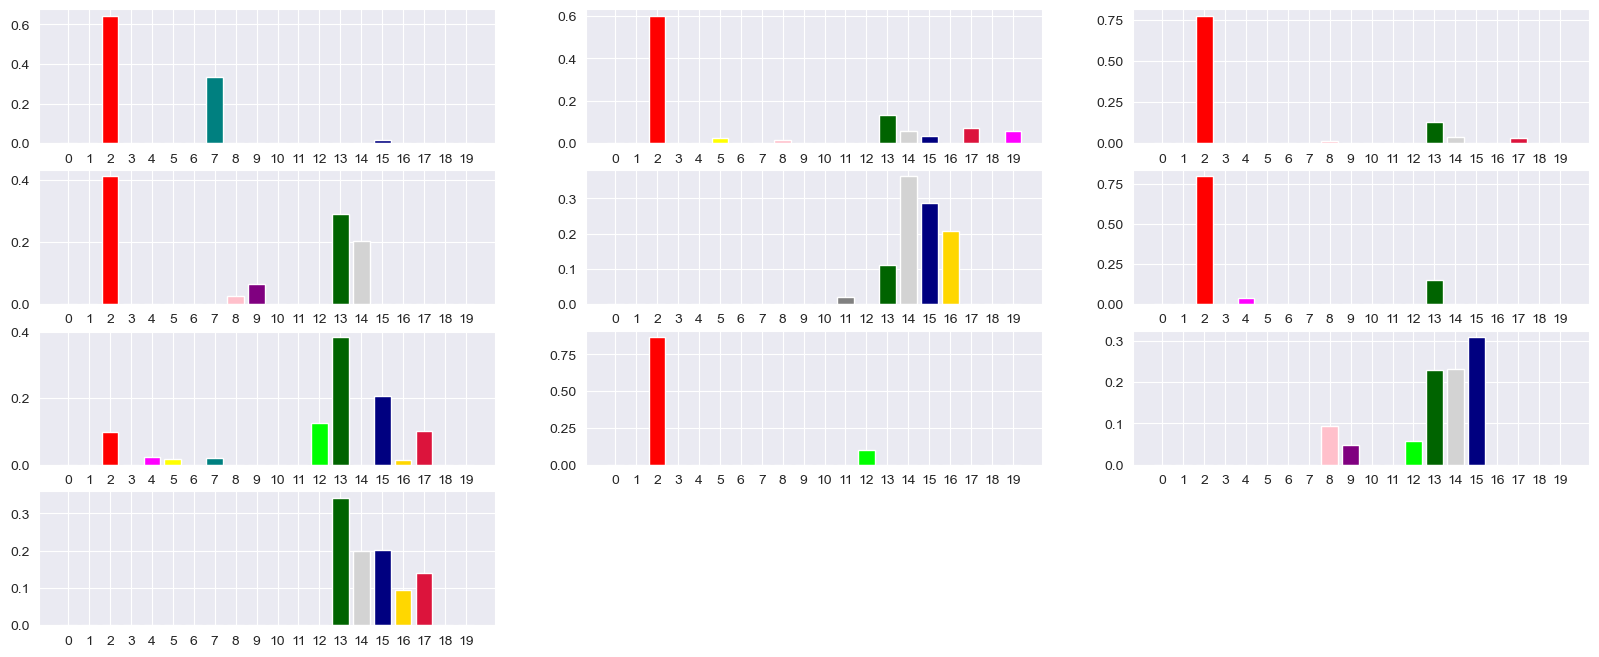

In [61]:
# choose some colours for the topics (20 colours for 20 topics)
colours = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'teal', 'pink', 'purple',
           'orange', 'gray', 'lime', 'darkgreen', 'lightgray', 'navy', 'gold', 'crimson', 'darkgray', 'fuchsia']

# convert_theta_sparse_to_dense函数的目的是将LDA模型返回的稀疏主题分布（即文档中仅有非零概率的主题及其概率）转换为一个完整的稠密向量。在这个向量中，每个主题都有一个值，即使某些主题在文档中的概率为零。
def convert_theta_sparse_to_dense(theta_d_sparse, num_topics):
    theta_d = np.zeros(num_topics)  # an empty array
    
    # split the output from lda_model into two lists
    active_topics_in_d, probs = map(list, zip(*theta_d_sparse))
    
    # record the values in theta_d
    for i, topic in enumerate(active_topics_in_d):
        if topic >= num_topics:
            break
            
        theta_d[topic] = probs[i]
    
    return theta_d

# 绘制barplot
# input: thetas表示文档-主题分布列表，d表示文档索引，num_docs表示文档数量，num_topics表示主题数量
def plot_theta(thetas, d, num_docs, num_topics):
    plt.subplot(int(num_docs/3) + 1, 3, d+1)   # make a set of subplots inside a figure, with four subplots per row
    
    theta_d = convert_theta_sparse_to_dense(thetas[d], num_topics)
    
    # plot the results so that the same topics always occur at the same place along the x axis.
    plt.bar(x=np.arange(len(theta_d)), height=theta_d, color=colours, tick_label=np.arange(num_topics))
    
    
plt.figure(figsize=(20,8))
for d in range(10):
    plot_theta(thetas, d, num_docs=10, num_topics=20)
plt.show()

上述图片横坐标表示主题索引，纵坐标表示文档中每个主题的概率。每个子图代表一个文档，显示了该文档的主题分布。每个主题的颜色是固定的，因此可以在不同的子图中比较相同颜色的条形。这些条形的高度表示了文档中每个主题的概率。这种可视化方法有助于理解文档的主题分布，以及不同文档之间的主题分布差异。

In [62]:
# 计算每个新闻组的平均主题分布
def get_newsgroups_mean_topics(lda_model, num_topics):
    # mean_thetas是一个0矩阵，行数为新闻组数量，列数为主题数量
    mean_thetas = np.zeros((len(newsgroups_train.target_names), num_topics))
    print(mean_thetas.shape)
    
    for t, target_name in enumerate(newsgroups_train.target_names):
        # 循环遍历每个新闻组，获取该新闻组中的文档主题分布
        thetas_t_sparse = get_topic_dists_in_newsgroup(target_name, lda_model, max_num_docs=10)
        print(thetas_t_sparse)
        
        # 将稀疏主题分布转换为稠密主题分布
        thetas_t = []
        for theta_d_t_sparse in thetas_t_sparse:
            if not theta_d_t_sparse:
                continue  # if it's empty
            thetas_d = convert_theta_sparse_to_dense(theta_d_t_sparse, num_topics)
            thetas_t.append(thetas_d)
            
        # 只有当这个新闻组有文档时才进行下一步
        if thetas_t:
            # 计算该新闻组中文档的平均主题分布
            mean_thetas[t] = np.mean(thetas_t, axis=0)
        #print(mean_thetas[t])
    return mean_thetas

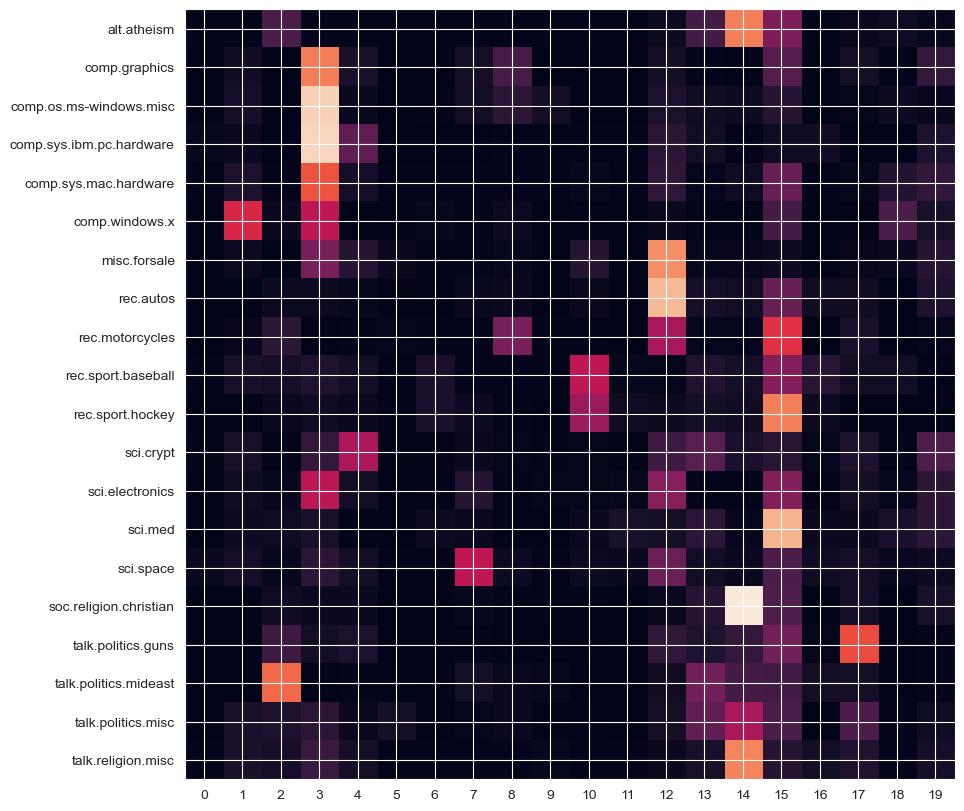

In [63]:
# 绘制每个新闻组平均主题分布热图
def plot_newsgroup_topic_matrix(model, num_topics):
    # 使用get_newsgroups_mean_topics函数获取每个新闻组的平均主题分布
    mean_thetas = get_newsgroups_mean_topics(model, num_topics)
    
    print(f'mean_thetas is a matrix of shape {mean_thetas.shape}')

    # Create a new figure
    plt.figure(figsize=(20,10))
    clear_output()

    # Plot the matrix as a 2-D grid, where colours represent the values.
    plt.imshow(mean_thetas)

    # Change the labels on the axes
    plt.yticks(range(len(newsgroups_train.target_names)), newsgroups_train.target_names )
    plt.xticks(range(num_topics))

    plt.show()
    
plot_newsgroup_topic_matrix(lda_model, 20)

# HDP: Hierarchical Dirichlet Process 分层狄利克雷过程
当无法确定主题数量时，可以使用HDP模型。HDP模型是LDA模型的贝叶斯非参数扩展，它可以自动确定主题数量，而不需要用户指定。这使得HDP模型在处理大型文档集时非常有用，因为它可以自动适应文档集的规模和复杂性。

### 参数
在使用层次狄利克雷过程（HDP）模型进行主题建模时，参数设置对模型的性能和最终结果有重要影响。参数的选择依赖于具体的实现库，例如Gensim。以下是Gensim中HDP模型的一些常见参数及其解释：

1. **T**：主题的最大数量。这是模型预设的上限，但实际识别出的主题数量可能会少于这个值，因为HDP会自动调整所需的主题数量。

2. **K**：每个主题下的特征（词汇）数。这个参数设置每个主题中要考虑的最大词汇数。

3. **alpha**：文档-主题密度的先验。这是控制文档中主题分布稀疏程度的超参数，较小的值会导致文档包含较少的主题。

4. **gamma**：主题-词汇密度的先验。这是一个高层次的先验，控制整个模型中主题数量的稀疏程度。

5. **eta**：词汇分布的先验。这个参数影响主题中词汇的分布，类似于LDA中的beta参数。

6. **scale**：用于控制学习率的参数，可以影响模型收敛的速度和稳定性。

7. **var_converge**：收敛标准，用于确定模型的训练何时停止。这是通过比较连续迭代之间的变分目标函数的变化来判断的。当变化量小于这个阈值时，认为模型已经收敛。






In [95]:
from gensim.models import HdpModel

hdp_model = HdpModel(bow_corpus, dictionary, alpha=0.01, gamma=0.01)

# 单词-主题分布
topics = hdp_model.print_topics()
for topic in topics:
    print(topic) 

(0, '0.005*people + 0.005*know + 0.005*think + 0.004*like + 0.004*time + 0.004*say + 0.003*go + 0.003*come + 0.003*use + 0.003*work')
(1, '0.005*use + 0.005*file + 0.004*edu + 0.004*program + 0.004*like + 0.004*know + 0.003*work + 0.003*include + 0.003*available + 0.003*image')
(2, '0.434*ax + 0.031*max + 0.007*pl + 0.004*ei + 0.004*di + 0.004*tm + 0.003*wm + 0.003*bhj + 0.003*giz + 0.003*cx')
(3, '0.007*file + 0.006*output + 0.005*know + 0.004*like + 0.004*program + 0.003*use + 0.003*time + 0.003*think + 0.003*work + 0.003*line')
(4, '0.004*people + 0.003*know + 0.003*think + 0.003*like + 0.002*armenian + 0.002*edu + 0.002*get + 0.002*post + 0.002*time + 0.002*new')
(5, '0.004*good + 0.004*flyers + 0.003*play + 0.003*game + 0.003*get + 0.002*point + 0.002*go + 0.002*time + 0.002*like + 0.002*windows')
(6, '0.003*think + 0.003*like + 0.003*know + 0.002*time + 0.002*father + 0.002*son + 0.002*new + 0.002*say + 0.002*people + 0.002*thank')
(7, '0.002*say + 0.002*gun + 0.002*think + 0.002

# 4. TI-IDF
## 4.1 Similarity 文档相似度
对于许多任务来说，计算文档之间的相似性是很有用的，例如，如果我们想将文档聚类到一组中，或者检索一些与我们当前正在阅读的文档相似的文档。为了计算相似性或距离，我们需要将文档表示为数值向量。到目前为止，我们运行的代码为每个文档生成了词袋向量，其中向量中的每个条目都是词汇表中单词的计数。

为了计算文档之间的相似性，我们使用余弦相似度：

$$similarity<v_1, v_2> = \frac{v_1 \cdot v_2}{|| v_1 || \cdot || v_2 ||}$$

In [68]:
def cossim(vec1, vec2):   # 计算余弦相似度
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# eg:定义两个向量
v1 = np.array([1, 2, 3])
v2 = np.array([10, 3, 4])
print(cossim(v1, v2))

0.6693280212272604


## 4.2 BOW 模型的相似度
首先使用词袋模型（BoW）表示文档，然后计算文档之间的相似性。之后，我们将使用TF-IDF模型来表示文档，并计算文档之间的相似性。我们将比较这两种方法的结果。

bow_doc= bow_corpus[idx] ：词袋向量（稀疏表示）
bow_vec: bow_doc的稠密向量表示

In [80]:
# 使用之前定义的函数，查找‘rec.autos’新闻组中的文档索引
doc_idxs = get_document_ids_in_newsgroup('rec.autos', newsgroups_train)

# query_doc是一个词袋向量，表示文档中每个单词的计数.
# query_doc是一个稀疏向量，它只包含非零计数的单词。【(word_id, word_count)】
doc_idx_0 = doc_idxs[19] # 选择第20个文档
query_doc = bow_corpus[doc_idx_0]
# 将query_doc转换为稠密向量（用0填充） 【(all_word_id, word_count)】
query_vec = np.zeros(len(dictionary))
for idx, count in query_doc:
    query_vec[idx] = count
    
# 提取另一个属于同一新闻组的文档作为比较文档
doc_idx_1 = doc_idxs[17]
comparison_doc_1 = bow_corpus[doc_idx_1]
# 将比较文档转换为稠密向量
comparison_1_vec = np.zeros(len(dictionary))
for idx, count in comparison_doc_1:
    comparison_1_vec[idx] = count
    
# 计算query_doc和comparison_doc_1的余弦相似度
cos_sim1 = cossim(query_vec, comparison_1_vec)
print(f'The cosine similarity for BoW is: {cos_sim1}')

There are 594 documents in the newsgroup rec.autos
The cosine similarity for BoW is: 0.1416481749175184


## 4.3 TF-IDF 模型的相似度
TF-IDF（Term Frequency-Inverse Document Frequency）是一种用于信息检索和文本挖掘的常用加权技术。它的目的是通过降低常见词的权重，提高罕见词的权重，来突出文档中的重要单词。

使用TfidfModel类，我们可以将词袋向量转换为TF-IDF向量。然后，我们可以使用TF-IDF向量计算文档之间的相似性。
```python
tfidf_model = TfidfModel(bow_corpus) # 使用训练集的词袋模型来训练TF-IDF模型
tfidf_vec= tfidf_model[bow_corpus[doc_idx]] # 使用tfidf_model将词袋向量转换为TF-IDF向量
```

注意，使用tfidf_model[]得到的向量仍然是稀疏的，因为它只包含非零值。需要转换为稠密向量，以便计算余弦相似度。

---

tfidf_doc=tfidf_model[bow_corpus[doc_idx]] ：TF-IDF向量（稀疏表示）(word_id, tfidf_weight)
tfidf_vec: tfidf_doc的稠密向量表示

tfidf_weight：是该词在文档中的 TF-IDF 权重值。这个权重反映了词在当前文档中的重要性，同时考虑到了词在整个文档集合中的分布。

In [83]:
# 使用训练集的词袋模型来训练TF-IDF模型
tfidf_model = TfidfModel(bow_corpus)

# 使用tfidf_model将词袋向量转换为TF-IDF向量
query_tfidf = tfidf_model[query_doc]
comparison_1_tfidf = tfidf_model[comparison_doc_1]

# 将TF-IDF向量转换为稠密向量
query_tfidf_vec = np.zeros(len(dictionary))
for idx, value in query_tfidf:
    query_tfidf_vec[idx] = value
    
comparison_1_tfidf_vec = np.zeros(len(dictionary))
for idx, value in comparison_1_tfidf:
    comparison_1_tfidf_vec[idx] = value
    
# 计算query_doc和comparison_doc_1的余弦相似度
cos_sim2 = cossim(query_tfidf_vec, comparison_1_tfidf_vec)
print(f'The cosine similarity for Tf-idf is: {cos_sim2}')

The cosine similarity for Tf-idf is: 0.16321669326060237



### 词袋向量计算相似度

- **基于数量**：词袋模型仅考虑每个词在文档中出现的频次，而不考虑词语的顺序或语义信息。
- **等权重**：所有词语被平等对待，不管它们在文档集合中出现得有多频繁。
- **结果特点**：当两个文档使用了许多相同的常用词时（例如，“的”，“是”，“在”等），即使这些词对文档的主题贡献不大，相似度也可能会显得较高。

### TF-IDF向量计算相似度

- **基于权重**：TF-IDF增加了对词频（TF）和逆文档频率（IDF）的考量，通过降低常见词的权重并提升罕见词的权重，更加注重词语的区分度。
- **区分能力**：TF-IDF模型提高了重要词语的影响力，这些词对于文档的特定主题或内容有更大的贡献。
- **结果特点**：如果两个文档在某些重要（即在文档集合中不那么常见）词语上相似度较高，即使它们在其他常见词上的使用频率不同，通过TF-IDF计算得到的相似度也可能较高。

TF-IDF模型能够更好地捕捉到文档中的关键词和重要信息。TF-IDF通过降低那些在多个文档中频繁出现的词的权重，能够突出那些对文档主题更具区分力的词语。

# 5.Term-Document Matrices & Word Embeddings
## 5.1 Term-Document Matrices
使用sklearn库中的CountVectorizer类，我们可以很容易地构建词项-文档矩阵（TDM）。

- `vectorizer.fit_transform(raw_text)`：将原始文本转换为词项-文档矩阵。这个矩阵的行数等于文档的数量，列数等于词汇表的大小。矩阵中的每个元素表示相应文档中相应词汇的频次。
- `vectorizer.vocabulary_.get('happy')`：获取单词'happy'的索引。

In [86]:
raw_text=newsgroups_train.data

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(raw_text)

In [87]:
# 获取单词索引
happy_idx = vectorizer.vocabulary_.get('happy')
enjoy_idx = vectorizer.vocabulary_.get('enjoy')
homework_idx = vectorizer.vocabulary_.get('homework')

# 提取单词向量
# toarray()将稀疏矩阵转换为正常的矩阵(仍然是2维的)
# flatten()将矩阵展平为1维，用于计算余弦相似度
happy_vec = X[:, happy_idx].toarray().flatten()
enjoy_vec = X[:, enjoy_idx].toarray().flatten()
homework_vec = X[:, homework_idx].toarray().flatten()

# 计算余弦相似度
similarity_happy_enjoy = cossim(happy_vec, enjoy_vec)
similarity_happy_homework = cossim(happy_vec, homework_vec)

print(f'The cosine similarity between "happy" and "enjoy" is: {similarity_happy_enjoy}')
print(f'The cosine similarity between "happy" and "homework" is: {similarity_happy_homework}')

The cosine similarity between "happy" and "enjoy" is: 0.02211159971291128
The cosine similarity between "happy" and "homework" is: 0.0


## 5.2 Word Embeddings
TDM简单但也稀疏，有许多零，而且不能很好地捕捉单词之间的复杂关系，例如，同义词。一个更有效的方法是 _单词嵌入_，它以无监督的方式学习单词的向量表示。第一种方法是 ``word2vec`` 的一部分，它通过训练分类器来预测一对单词在相同上下文中出现的频率，即在训练集中的文档中彼此相距几个单词。分类器是逻辑回归模型，它们的权重可以用来表示单词作为训练任务的副产品。这些权重编码了关于语法和语义的大量有用信息：出现在相似上下文中的单词将具有相似的向量。


## Word2Vec

使用`word2vec`方法训练词嵌入模型`emb_model`，其中包含了几个重要的参数：

- `tokenized_texts`：分词后的文本，作为训练数据输入。
- `sg=1`：使用Skip-Gram模型。如果设置为`0`，则使用CBOW模型。
- `min_count=1`：词语出现的最小次数。此参数确保了只有至少出现一次的词语才会被纳入训练。
- `window=3`：当前词与预测词在一个句子中的最大距离。
- `vector_size=100`：特征向量的维度大小。

在模型训练完成后，`emb_model.wv`可以用来访问词向量：

- `emb_model.wv['happy']`：这行代码返回词语“happy”的向量表示。如果“happy”在训练的词汇表中，你将得到一个100维的向量，这个向量是“happy”在训练数据中的语义被编码后的表示。

- `emb_model.wv.similar_by_word('happy', topn=5)`：这行代码用于查找与“happy”最相似的5个词。它返回一个列表，列表中的每个元素都是一个元组，包含一个词和一个表示相似度的分数。这个方法基于余弦相似度计算“happy”与词汇表中其他所有词的相似度，然后返回最相似的前5个词及其相似度分数。

通过这种方式，`word2vec`模型不仅能够为每个词提供一个密集的向量表示，而且还能够捕捉词与词之间的相似性，这对于许多自然语言处理任务非常有帮助。

“happy”的向量表示是一种将这个词映射到一个高维空间中的点的方法，这个点由一系列数值（向量中的元素）构成。在词嵌入模型（如Word2Vec）中，每个维度的具体意义不是预先定义的，而是通过模型在训练过程中自动学习得到的。向量中的每个值代表了该词在某种隐含的语义或语法维度上的坐标。

比如，对于“happy”的100维向量表示，每个值都是一个浮点数，这些数值共同构成了“happy”这个词在100维空间中的位置。这个空间是由训练数据中的词汇关系自动学习出来的，而不是人为指定的。向量的每个维度都可能对应于一些难以直接解释的语言特性，如情感倾向、使用场合、与其他词的关联性等。

向量表示的核心优势在于它能够捕捉词与词之间的相似性。例如，如果两个词经常出现在相似的上下文中，它们的向量表示可能会在向量空间中彼此接近。这意味着，即使我们无法精确解释每个维度的具体含义，这种表示方法仍然可以让我们通过计算向量之间的距离（如余弦相似度）来量化词之间的语义相似性。

在自然语言处理任务中，这种词的向量表示被广泛用于捕捉文本中的深层语义信息，从而支持文本分类、情感分析、机器翻译等应用。通过这种方式，计算机能够以一种更接近人类语言理解的形式处理自然语言。



### CBOW

**原理**：CBOW模型通过上下文（周围的词）预测当前词。具体来说，给定一个词的上下文，模型尝试预测这个上下文中心位置的词。

**优点**：
- 训练速度快：CBOW在处理大型语料库时通常比Skip-gram快，因为它对上下文中的所有词进行平均，从而降低了模型的复杂度。
- 对于频繁词效果较好：对于常见词，CBOW往往能够获得更准确的表示。

**缺点**：
- 对于罕见词效果较差：由于CBOW在处理上下文时对所有词进行了平均，它可能无法捕捉到罕见词的细微差别。

### Skip-gram

**原理**：Skip-gram模型通过当前词预测其周围的上下文。具体来说，给定一个词，模型尝试预测这个词在一个窗口内的上下文词。

**优点**：
- 对于罕见词和复杂模式效果较好：Skip-gram在处理罕见词或者特定上下文的词时表现更好，因为它对每个上下文-目标词对进行预测，从而能够捕捉到更细致的语义关系。
- 能够捕捉到更多的词关系：由于Skip-gram对每个上下文位置的词单独建模，它通常能学习到更丰富的词嵌入。

**缺点**：
- 训练速度慢：相比于CBOW，Skip-gram模型在大型语料库上的训练速度较慢，因为它需要为每个词预测多个上下文词。
- 计算成本高：由于需要预测多个上下文词，Skip-gram模型在训练时的计算成本比CBOW更高。

总结来说，CBOW适合于快速训练和对频繁词的较好表示，而Skip-gram适合于获得更精细的词嵌入，特别是对于罕见词和捕捉复杂模式。在实际应用中，选择哪种模型取决于具体任务的需求、语料库的大小和特性，以及计算资源的限制。



In [88]:
from gensim.models import word2vec
from gensim.utils import tokenize

tokenized_texts = [list(tokenize(text)) for text in raw_text]
emb_model = word2vec.Word2Vec(tokenized_texts, sg=1, min_count=1, window=3, vector_size=100)

In [93]:
print(emb_model.wv['happy'])
print(emb_model.wv.similar_by_word('happy', topn=5))

[-0.14974026 -0.15681928  0.3205552   0.46210277  0.27641058  0.12736388
 -0.09672537  0.23346972  0.15887126 -0.13642657  0.22667141 -0.84827715
 -0.2676656   0.29856476 -0.04058818  0.62683606  0.4120298   0.16251522
 -0.02465447 -0.28004563  0.114631   -0.10421186  0.07748608 -0.5973082
  0.5346673   0.7311108   0.00397389  0.3900177   0.3633319   0.46901256
  0.38897872  0.05340841 -0.15644579  0.33459565  0.19224922  0.1760823
  0.00725016  0.53534174  0.3073414  -0.03531057  0.4266574  -0.17575255
 -0.24158542  0.03760028 -0.1094643   0.7005147   0.11397032 -0.46765
 -0.23835751 -0.10409758  0.33300003 -0.298766   -0.06235459  0.04158067
 -0.17382719 -0.31970426  0.21412392 -0.03500791 -0.5125551   0.11814979
 -0.68575764  0.06111605 -0.498107   -0.6088456  -0.10852563  0.07935946
  0.34590644 -0.2366898   0.1356786   0.60599154 -0.02891331 -0.3238245
  0.1573923   0.12833877 -0.37950063 -0.2360237  -0.8875459  -0.5323765
  0.23118232  0.365457   -0.481947    0.02580207  0.216337

### GloVe
我们还可以下载一个预训练模型，该模型以前已经在大型语料库上进行了训练——这意味着我们不需要训练自己的模型，也不需要自己获取大型数据集。相反，我们可以利用一个在更多数据上训练过的模型，它可以提供高质量的嵌入。

这里有一个可用模型的列表。这里有一个可用模型的列表[here](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)。让我们尝试一下 GLoVe 嵌入。GLoVe 是 skipgram 模型的一种替代模型。该模型是在一个推特语料库上训练的，因此它可能编码了与我们之前的模型不同的关系。

GloVe（Global Vectors for Word Representation）模型提供了不同版本的预训练词向量，这些向量在不同的数据集上训练，并且具有不同的维度，比如25维、50维、100维、200维等。选择哪种维度的模型取决于你的具体需求，包括你希望模型的复杂度，以及你处理的自然语言处理任务的特点。


In [94]:
import gensim.downloader

# 加载预训练的GloVe模型
glove_wv = gensim.downloader.load('glove-twitter-25')
print(glove_wv['happy'])
print(glove_wv.similar_by_word('happy', topn=5))

[-1.2304   0.48312  0.14102 -0.0295  -0.65253 -0.18554  2.1033   1.7516
 -1.3001  -0.32113 -0.84774  0.41995 -3.8823   0.19638 -0.72865 -0.85273
  0.23174 -1.0763  -0.83023  0.10815 -0.51015  0.27691 -1.1895   0.98094
 -0.13955]
[('birthday', 0.9577818512916565), ('thank', 0.937666654586792), ('welcome', 0.93361496925354), ('love', 0.917618453502655), ('miss', 0.9164499640464783)]
